Input nesseary file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

Import dataset

In [2]:
(x_train, y_train), (_, _) = cifar10.load_data()

In [3]:
print(x_train.shape)

(50000, 32, 32, 3)


Normalize data

In [4]:
x_train = x_train.astype("float32") / 255.0 
x_train_flat = x_train.reshape((x_train.shape[0], -1))

In [5]:
print(x_train_flat.shape)

(50000, 3072)


In [ ]:
input_dim = 32 * 32 * 3  
latent_dim = 2           # We want 2D features

In [7]:
# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
latent = Dense(latent_dim)(encoded) 

# Decoder
decoded = Dense(64, activation='relu')(latent)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

# Encoder model (for feature extraction)
encoder = Model(input_img, latent)

In [8]:
autoencoder.fit(x_train_flat, x_train_flat, epochs=20, batch_size=256, shuffle=True)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0516
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0388
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0371
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0370
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0371
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0368
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0365
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0363
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0361
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0357
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0356
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0352
Epoch 13/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0351
Epoch 14/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0352
Epoch 15/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [9]:
features_2d = encoder.predict(x_train_flat)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step


In [10]:
labels = y_train.flatten()

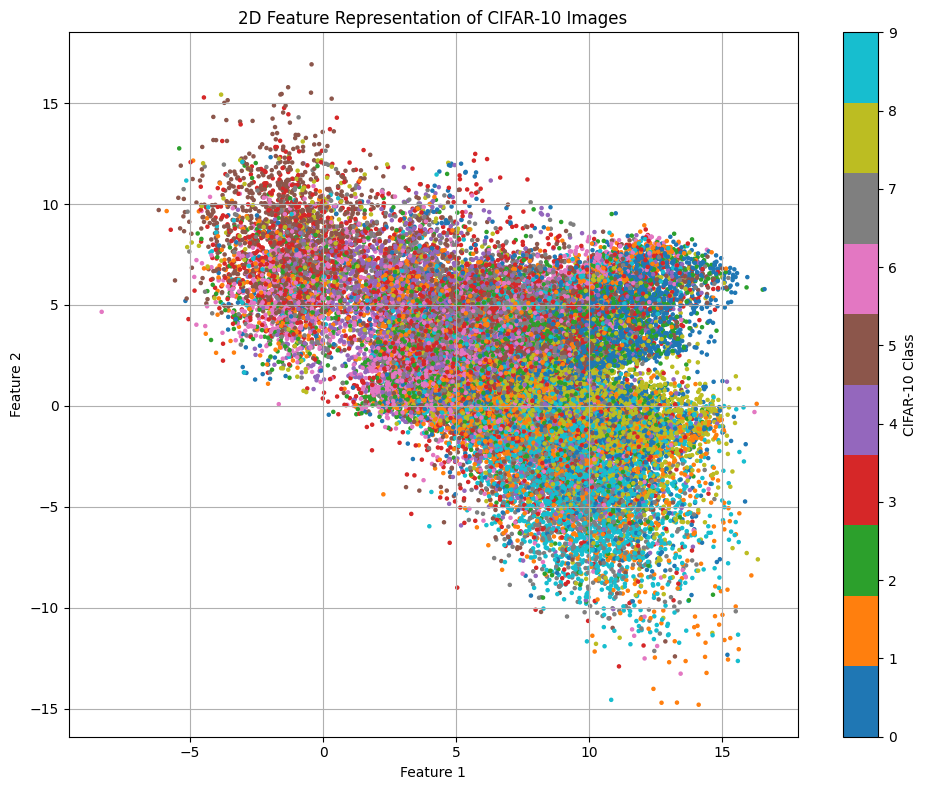

In [11]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='tab10', s=5)
plt.colorbar(scatter, ticks=range(10), label='CIFAR-10 Class')
plt.title("2D Feature Representation of CIFAR-10 Images")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.manifold import TSNE
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [15]:
x_subset = x_train_flat
y_subset = y_train.flatten()

In [17]:
x_subset = x_train[:2000]
y_subset = y_train[:2000]


x_resized = np.array([img_to_array(array_to_img(img).resize((96, 96))) for img in x_subset])
x_resized = preprocess_input(x_resized.astype('float32'))

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step


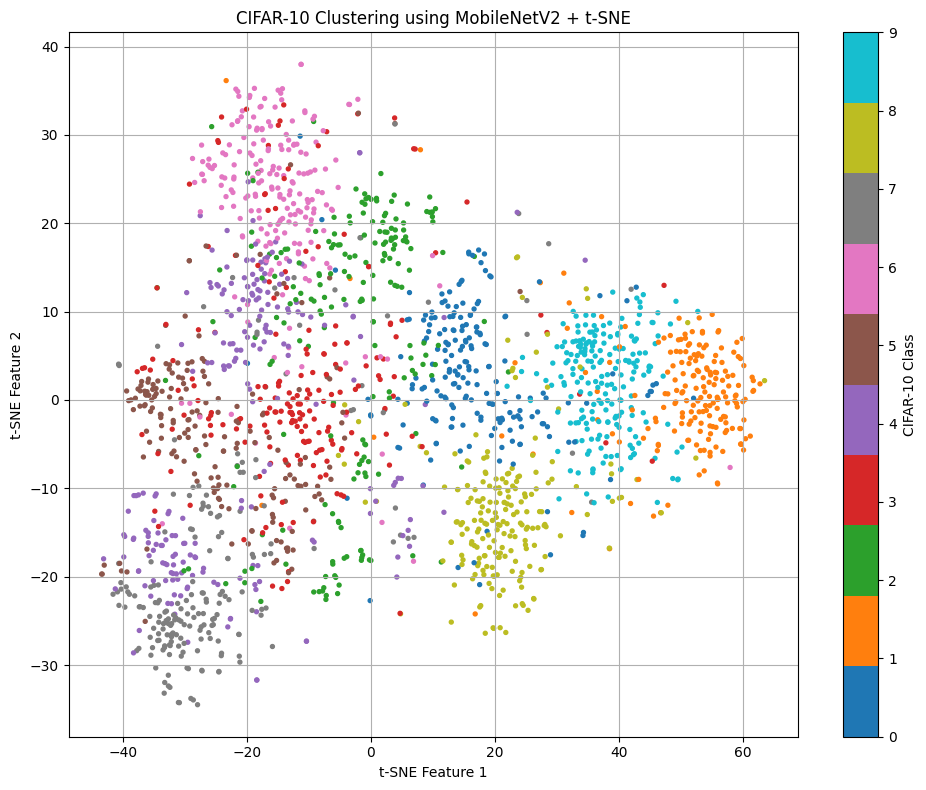

In [18]:


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

features = model.predict(x_resized, verbose=1)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_2d = tsne.fit_transform(features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=y_subset, cmap='tab10', s=8)
plt.colorbar(scatter, ticks=range(10), label="CIFAR-10 Class")
plt.title("CIFAR-10 Clustering using MobileNetV2 + t-SNE")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()